In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


### Read data into data frame

In [0]:
import pandas as pd

df = pd.read_csv('/content/drive/My Drive/Credit card fraud detection/creditcard.csv')

In [0]:
df.describe()

Time            V1  ...         Amount          Class
count  284807.000000  2.848070e+05  ...  284807.000000  284807.000000
mean    94813.859575  3.919560e-15  ...      88.349619       0.001727
std     47488.145955  1.958696e+00  ...     250.120109       0.041527
min         0.000000 -5.640751e+01  ...       0.000000       0.000000
25%     54201.500000 -9.203734e-01  ...       5.600000       0.000000
50%     84692.000000  1.810880e-02  ...      22.000000       0.000000
75%    139320.500000  1.315642e+00  ...      77.165000       0.000000
max    172792.000000  2.454930e+00  ...   25691.160000       1.000000

[8 rows x 31 columns]

In [0]:
df.head(5)

Time        V1        V2        V3  ...       V27       V28  Amount  Class
0   0.0 -1.359807 -0.072781  2.536347  ...  0.133558 -0.021053  149.62      0
1   0.0  1.191857  0.266151  0.166480  ... -0.008983  0.014724    2.69      0
2   1.0 -1.358354 -1.340163  1.773209  ... -0.055353 -0.059752  378.66      0
3   1.0 -0.966272 -0.185226  1.792993  ...  0.062723  0.061458  123.50      0
4   2.0 -1.158233  0.877737  1.548718  ...  0.219422  0.215153   69.99      0

[5 rows x 31 columns]

In [0]:
df.shape

(284807, 31)

In [0]:
import plotly.figure_factory as ff
import numpy as np
np.random.seed(1)

x = np.random.randn(1000)
hist_data = [x]
group_labels = ['distplot'] # name of the dataset

fig = ff.create_distplot([df['Time']], group_labels)
fig.show()

### Distribution plot of time

We can see that since the data represents two days, credit card transactions are more in the day time.
So there are spikes in morning

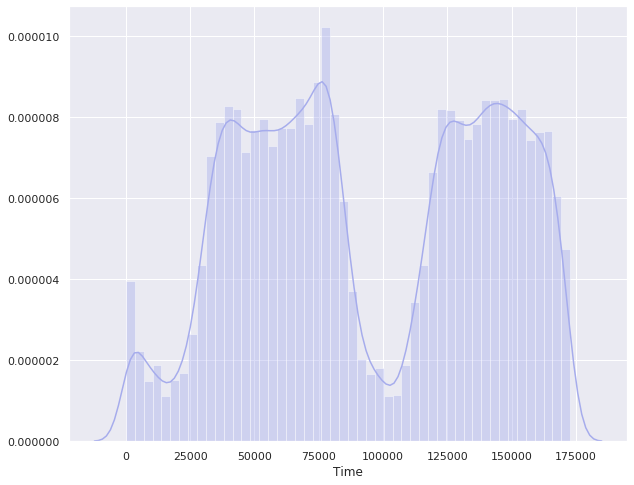

In [0]:
import seaborn as sns, numpy as np
import matplotlib.pyplot as plt

plt.figure(figsize=(10,8))
sns.set(); 
ax = sns.distplot(df['Time'], color = '#A6ACEC')

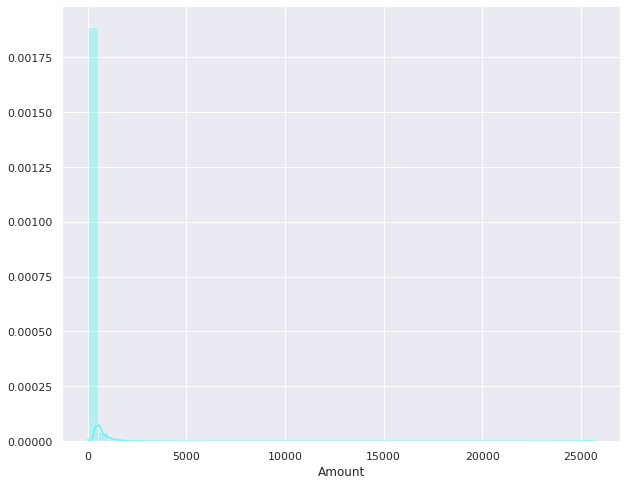

In [0]:
import seaborn as sns, numpy as np
plt.figure(figsize = (10, 8))
sns.set(); 
ax = sns.distplot(df['Amount'], color = '#63F5EF')

In [0]:
non_fraud = df['Class'].value_counts()[0]
fraud = df['Class'].value_counts()[1]


### Imbalance data set

We can see that non fraudulent data is a lot but the no of rows in  fraudulent case is less

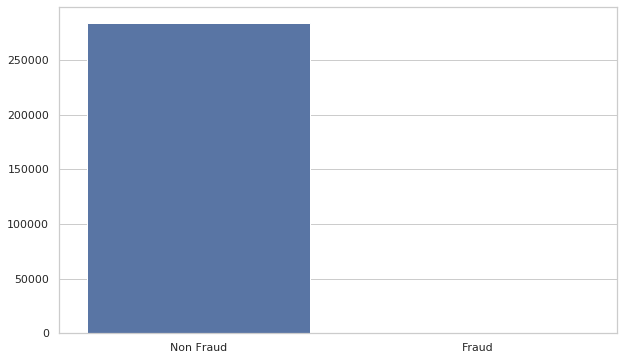

In [0]:
import seaborn as sns
plt.figure(figsize=(10,6))
sns.set(style="whitegrid")
# >>> tips = sns.load_dataset("tips)
ax = sns.barplot(x=['Non Fraud' , 'Fraud'], y=[non_fraud, fraud])

In [0]:
cor = df.corr()

### Correlation heatmap for different features

We can see that most of the featires are not related except the features being related with Class and Amount

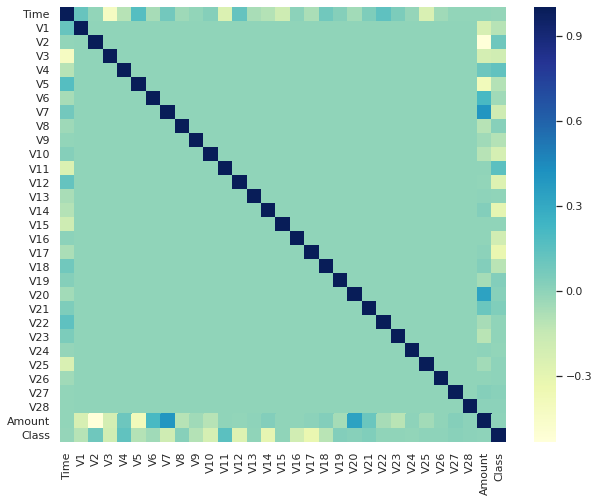

In [0]:
plt.figure(figsize=(10,8))
ax = sns.heatmap(cor, cmap="YlGnBu")

Centering the data at 0 and making the standard deviation to 1

In [0]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_df = scaler.fit_transform(df)


In [0]:
scaled_df

array([[-1.99658302, -0.69424232, -0.04407492, ..., -0.06378115,
         0.24496426, -0.04159898],
       [-1.99658302,  0.60849633,  0.16117592, ...,  0.04460752,
        -0.34247454, -0.04159898],
       [-1.99656197, -0.69350046, -0.81157783, ..., -0.18102083,
         1.16068593, -0.04159898],
       ...,
       [ 1.6419735 ,  0.98002374, -0.18243372, ..., -0.0804672 ,
        -0.0818393 , -0.04159898],
       [ 1.6419735 , -0.12275539,  0.32125034, ...,  0.31668678,
        -0.31324853, -0.04159898],
       [ 1.64205773, -0.27233093, -0.11489898, ...,  0.04134999,
         0.51435531, -0.04159898]])

In [0]:
scaled_df = pd.DataFrame(scaled_df, columns = df.columns)

In [0]:

scaled_df.head()

Time        V1        V2  ...       V28    Amount     Class
0 -1.996583 -0.694242 -0.044075  ... -0.063781  0.244964 -0.041599
1 -1.996583  0.608496  0.161176  ...  0.044608 -0.342475 -0.041599
2 -1.996562 -0.693500 -0.811578  ... -0.181021  1.160686 -0.041599
3 -1.996562 -0.493325 -0.112169  ...  0.186189  0.140534 -0.041599
4 -1.996541 -0.591330  0.531541  ...  0.651816 -0.073403 -0.041599

[5 rows x 31 columns]

In [0]:
scaled_df.std()


Time      1.000002
V1        1.000002
V2        1.000002
V3        1.000002
V4        1.000002
V5        1.000002
V6        1.000002
V7        1.000002
V8        1.000002
V9        1.000002
V10       1.000002
V11       1.000002
V12       1.000002
V13       1.000002
V14       1.000002
V15       1.000002
V16       1.000002
V17       1.000002
V18       1.000002
V19       1.000002
V20       1.000002
V21       1.000002
V22       1.000002
V23       1.000002
V24       1.000002
V25       1.000002
V26       1.000002
V27       1.000002
V28       1.000002
Amount    1.000002
Class     1.000002
dtype: float64

In [0]:
scaled_df["Class"] = df["Class"]

In [0]:
fraud_features = scaled_df[scaled_df["Class"] == 1]

In [0]:
fraud_features.shape

(492, 31)

### Random under sampling

Dealing with imbalanced data

In [0]:
non_fraud_features = scaled_df[scaled_df["Class"] == 0].sample(fraud_features.shape[0]) 

In [0]:
non_fraud_features

Time        V1        V2  ...       V28    Amount  Class
242849  1.197546 -0.860236  0.260848  ... -0.287993 -0.292578      0
187139  0.686344 -0.300909 -0.177060  ...  0.233200 -0.241043      0
195231  0.761184  1.023914 -0.018784  ... -0.213383 -0.257275      0
215831  0.956517 -0.818648  1.091924  ... -0.799292 -0.337477      0
174618  0.572252  1.175977 -0.815245  ... -0.133954 -0.233287      0
...          ...       ...       ...  ...       ...       ...    ...
253028  1.289780  1.094915  0.069155  ... -0.280447 -0.349231      0
153752  0.108767  0.897177  0.194684  ... -0.071275 -0.074163      0
140164 -0.236667 -0.132358 -0.393796  ... -0.397122 -0.333239      0
11344  -1.580415 -0.590799  1.367740  ... -0.588489  0.006558      0
103305 -0.552178  0.620753 -0.061044  ... -0.036932 -0.276026      0

[492 rows x 31 columns]

In [0]:
scaled_corr = scaled_df.corr()

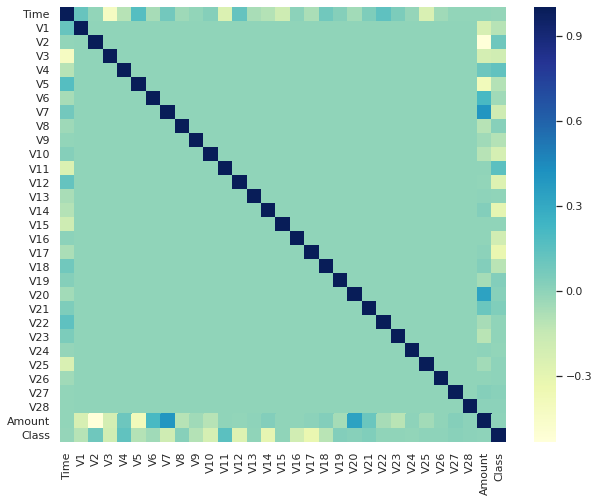

In [0]:
plt.figure(figsize=(10,8))
ax = sns.heatmap(scaled_corr, cmap="YlGnBu")

In [0]:
sub_sample_df = pd.concat([fraud_features.reset_index(), non_fraud_features.reset_index()])

In [0]:
sub_sample_df.shape

(984, 32)

In [0]:
from sklearn.utils import shuffle
sub_sample_df = shuffle(sub_sample_df)

In [0]:
sub_sample_corr = sub_sample_df.corr()


In [0]:
class_corr = sub_sample_corr[["Class"]]

In [0]:
class_corr[class_corr.Class < -0.5]

Class
V3  -0.568472
V9  -0.538620
V10 -0.626333
V12 -0.680307
V14 -0.746464
V16 -0.594735
V17 -0.560290

In [0]:
class_corr[class_corr.Class > 0.5]

Class
V4     0.713810
V11    0.683385
Class  1.000000

### Exploring outliers of features with high negative or positive correlation.

Box plots to see the outliers

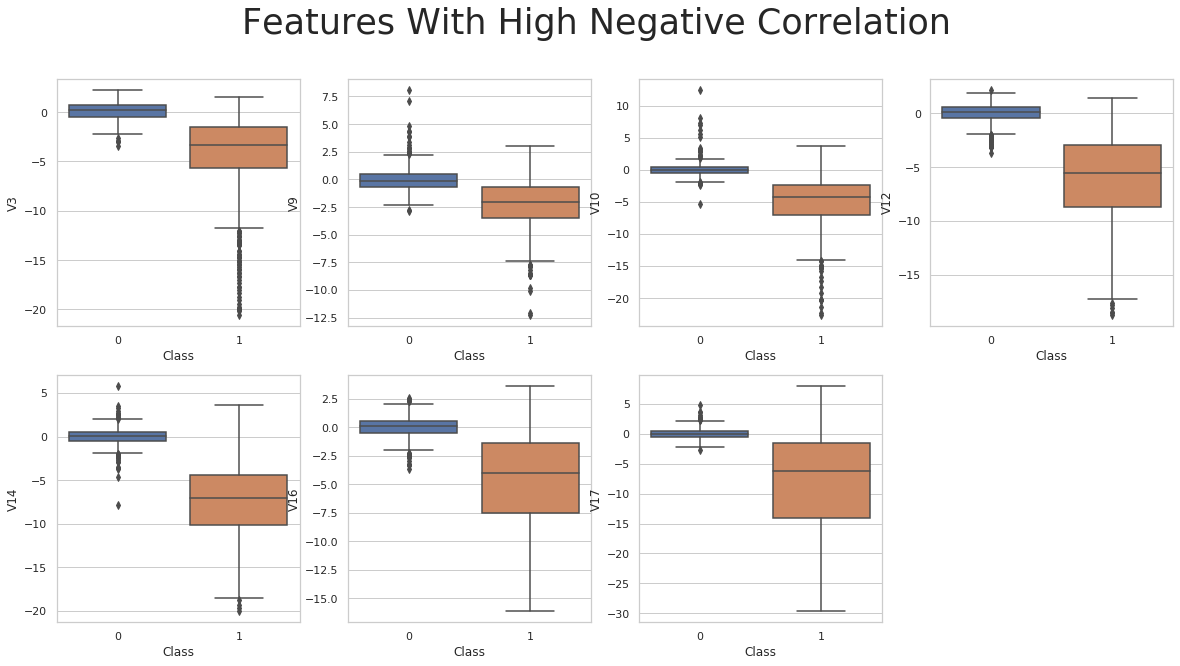

In [0]:

f, axes = plt.subplots(nrows=2, ncols=4, figsize=((20,10)))

f.suptitle('Features With High Negative Correlation', size=35)
sns.boxplot(x="Class", y="V3", data=sub_sample_df, ax=axes[0,0])
sns.boxplot(x="Class", y="V9", data=sub_sample_df, ax=axes[0,1])
sns.boxplot(x="Class", y="V10", data=sub_sample_df, ax=axes[0,2])
sns.boxplot(x="Class", y="V12", data=sub_sample_df, ax=axes[0,3])
sns.boxplot(x="Class", y="V14", data=sub_sample_df, ax=axes[1,0])
sns.boxplot(x="Class", y="V16", data=sub_sample_df, ax=axes[1,1])
sns.boxplot(x="Class", y="V17", data=sub_sample_df, ax=axes[1,2])
f.delaxes(axes[1,3])


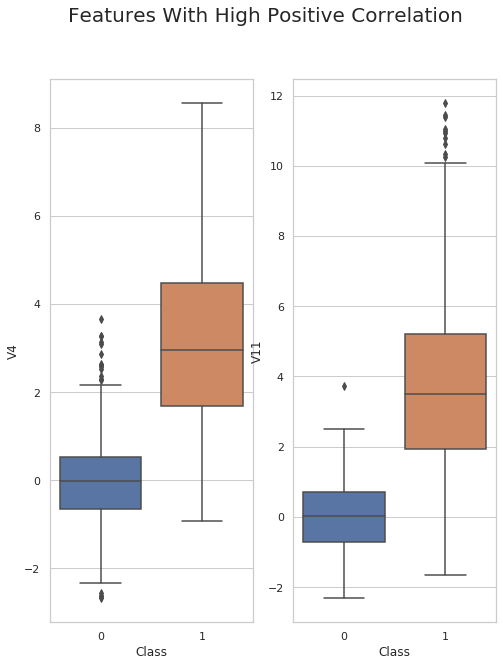

In [0]:
f, axes = plt.subplots(nrows=1, ncols=2, figsize=(8, 10))

f.suptitle('Features With High Positive Correlation', size=20)
sns.boxplot(x="Class", y="V4", data=sub_sample_df, ax=axes[0])
sns.boxplot(x="Class", y="V11", data=sub_sample_df, ax=axes[1])

Removing outliers with 2.5 inter quartile range as 1.5 iqr would eliminate a lot of rows and we already have shortage of data

In [0]:
iqr = sub_sample_df.quantile(0.75) - sub_sample_df.quantile(0.25) 
q1 = sub_sample_df.quantile(0.25)
q3 = sub_sample_df.quantile(0.75)

In [0]:
sub_sample_df = sub_sample_df.drop(['index'], axis = 1)

In [0]:
sub_sample_df = sub_sample_df.reset_index(drop = True)

In [0]:
sub_sample_df


Time        V1        V2  ...       V28    Amount  Class
0    1.352638 -0.319613  0.867557  ...  0.607718 -0.339996      0
1   -0.432779 -1.148999  1.432657  ...  0.990174  0.891295      1
2    1.078337  0.463900  1.725316  ...  1.091315 -0.348512      1
3    1.045550 -0.091693  0.288008  ...  0.615210 -0.233687      0
4    1.194619  1.097758 -0.291714  ... -0.252319 -0.093394      0
..        ...       ...       ...  ...       ...       ...    ...
979  0.897808  0.110434 -0.089238  ...  0.008256 -0.229289      0
980  1.239030 -2.651002  1.916496  ... -0.249077  0.637736      1
981  1.422571  0.990247 -0.278500  ... -0.117752 -0.313289      0
982 -0.869689 -0.213147  0.632178  ...  0.363846 -0.233287      0
983 -0.347432 -0.358763  0.867554  ...  0.492670 -0.344514      0

[984 rows x 31 columns]

In [0]:
df2 = sub_sample_df[~((sub_sample_df < (q1 - 2.5 * q1)) |(sub_sample_df > (q3 + 2.5 * iqr))).any(axis=1)]


In [0]:
#q1 = q1.drop('index')
#q3 = q3.drop('index')
iqr = q3 - q1

In [0]:
df2 = sub_sample_df[~((sub_sample_df < (q1 - 2.5 * iqr)) |(sub_sample_df > (q3 + 2.5 * iqr))).any(axis=1)]


Time        V1        V2  ...       V28    Amount  Class
0    1.316776  1.092131 -0.450840  ... -0.208635 -0.252877      0
1    1.155578  0.887180  0.029517  ... -0.031209 -0.110626      0
2   -0.194593 -0.896880  1.978177  ...  1.518250 -0.349231      1
3   -0.689307 -0.816594  1.579187  ...  0.409799  0.366426      1
4   -1.954214 -0.209466  0.628384  ...  0.268650 -0.346113      0
..        ...       ...       ...  ...       ...       ...    ...
977 -0.535289  0.582241  0.686876  ...  0.344412 -0.349231      1
978  1.510319 -1.727964  0.852397  ... -0.727064  0.646292      0
979  0.723448 -1.014548  1.414286  ...  0.829273 -0.350191      0
981 -0.645212 -0.478327  0.119100  ... -0.635382  0.402409      0
983  0.819514  0.600724  1.902687  ...  0.987242 -0.353229      1

[692 rows x 31 columns]

### T-sne for dimensionality reduction and also to visualize higher dimensional data to see that data is separable

In [0]:
from sklearn.manifold import TSNE

X_embedded = TSNE(n_components=2).fit_transform(df2.drop(['Class'], axis = 1))
X_embedded.shape

(691, 2)

In [0]:
y  = df2['Class']

We can see in the visualization of data projected to two dimensions , that the data is indeed separable

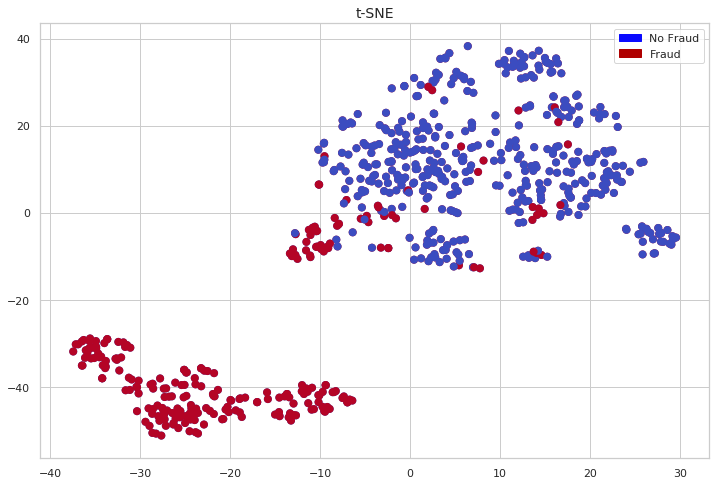

In [0]:
import matplotlib.patches as mpatches

f, ax = plt.subplots(figsize=(12,8))


blue_patch = mpatches.Patch(color='#0A0AFF', label='No Fraud')
red_patch = mpatches.Patch(color='#AF0000', label='Fraud')

ax.scatter(X_embedded[:,0], X_embedded[:,1], c=(y == 0), cmap='coolwarm', label='No Fraud', linewidths=2)
ax.scatter(X_embedded[:,0], X_embedded[:,1], c=(y == 1), cmap='coolwarm', label='Fraud', linewidths=2)
ax.set_title('t-SNE', fontsize=14)

ax.grid(True)

ax.legend(handles=[blue_patch, red_patch])

In [0]:
X = df2.drop(['Class'], axis = 1).reset_index(drop = True)
y = df2['Class'].reset_index(drop = True)

0      0
1      1
2      1
3      0
4      0
      ..
686    1
687    0
688    0
689    0
690    0
Name: Class, Length: 691, dtype: int64

In [0]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [0]:

X_train = X_train.values
X_validation = X_test.values
y_train = y_train.values
y_validation = y_test.values

In [0]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier

In [0]:
models = []

models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('SVM', SVC()))
models.append(('XGB', XGBClassifier()))
models.append(('RF', RandomForestClassifier()))

#testing models

results = []
names = []

for name, model in models:
    kfold = KFold(n_splits=10, random_state=42, shuffle = True)
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='roc_auc')
    results.append(cv_results)
    names.append(name)
    msg = '%s: %f (%f)' % (name, cv_results.mean(), cv_results.std())
    print(msg)


LR: 0.971873 (0.025969)
LDA: 0.971583 (0.029522)
KNN: 0.963318 (0.020846)
CART: 0.926061 (0.029056)
SVM: 0.973026 (0.022050)
XGB: 0.979266 (0.016696)
RF: 0.975446 (0.019077)


Peformance of various algorithms using box plots

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: MatplotlibDeprecationWarning:

Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.



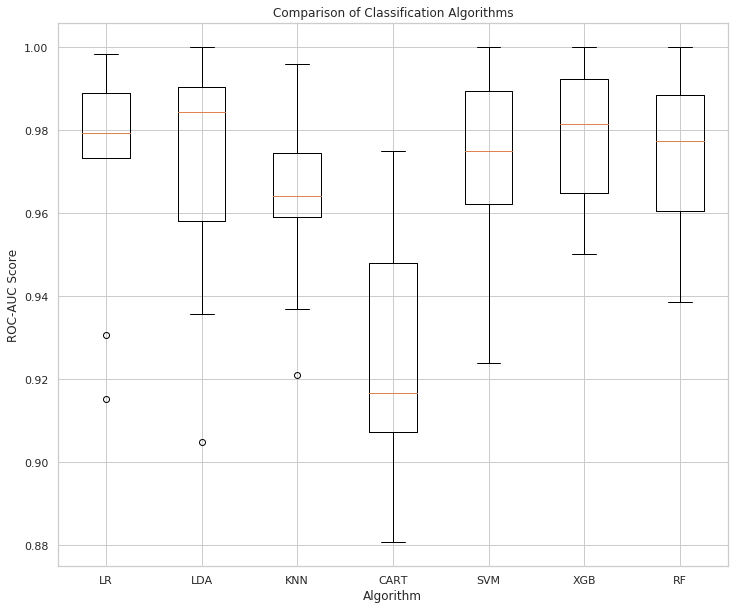

In [0]:
fig = plt.figure(figsize=(12,10))
plt.title('Comparison of Classification Algorithms')
plt.xlabel('Algorithm')
plt.ylabel('ROC-AUC Score')
plt.boxplot(results)
ax = fig.add_subplot(111)
ax.set_xticklabels(names)
plt.show()

Visualization of Random Forest Classifier

In [0]:


# Model (can also use single decision tree)
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=10)

# Train
model.fit(X_train, y_train)
# Extract single tree
estimator = model.estimators_[5]

from sklearn.tree import export_graphviz
# Export as dot file
export_graphviz(estimator, out_file='tree.dot', 
                feature_names = X.columns,
                class_names = ['0', '1'],
                rounded = True, proportion = False, 
                precision = 2, filled = True)

# Convert to png using system command (requires Graphviz)
from subprocess import call
call(['dot', '-Tpng', 'tree.dot', '-o', 'tree.png', '-Gdpi=600'])

# Display in jupyter notebook
from IPython.display import Image
Image(filename = 'tree.png', width = 1000, height = 1000)